In [4]:
# importing Libraries
# data_Cleaning process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load match data (Assume 'ipl_2024_matches.csv' is downloaded)
df = pd.read_csv("Downloads/ipl2024_matches.csv")

# Display first 5 rows
df.head()


,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah


In [24]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with appropriate values (if needed)
df.fillna({"first_score": 0, "second_score": 0, "first_wkts": 10, "second_wkts": 10}, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

id                      0
date                   54
team1                   0
team2                   0
toss_winner             0
decision                0
first_score             0
first_wkts              0
second_score            0
second_wkts             0
winner                  0
player_of_the_match     0
most_runs               0
most_wkts               0
dtype: int64


In [9]:
# Count number of matches won by each team
team_wins = df["winner"].value_counts()

# Display top teams
print(team_wins)

Kolkata      11
Rajasthan     9
Hyderabad     9
Chennai       7
Banglore      7
Lucknow       7
Delhi         7
Punjab        5
Gujarat       5
Mumbai        4
Abandoned     3
Name: winner, dtype: int64


In [10]:
# Count number of times toss winner won the match
toss_impact = (df["toss_winner"] == df["winner"]).sum()

# Print results
print(f"Toss winner also won the match in {toss_impact} out of {len(df)} matches ({(toss_impact / len(df)) * 100:.2f}%)")


Toss winner also won the match in 31 out of 74 matches (41.89%)


In [11]:
# Count Player of the Match frequency
best_players = df["player_of_the_match"].value_counts().head(5)

# Display results
print(best_players)


Travis Head        3
None               3
Abhishek Sharma    3
Sunil Narine       3
Kuldeep Yadav      2
Name: player_of_the_match, dtype: int64


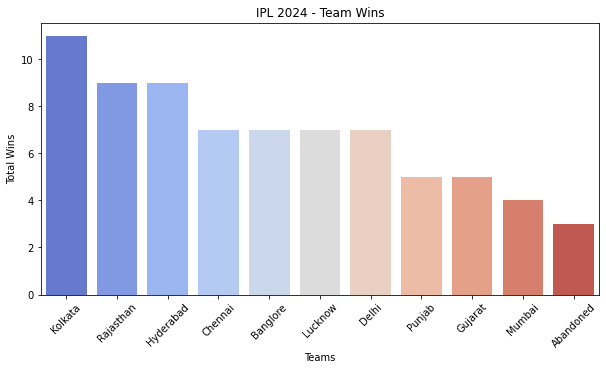

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="coolwarm")
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("IPL 2024 - Team Wins")
plt.xticks(rotation=45)
plt.show()


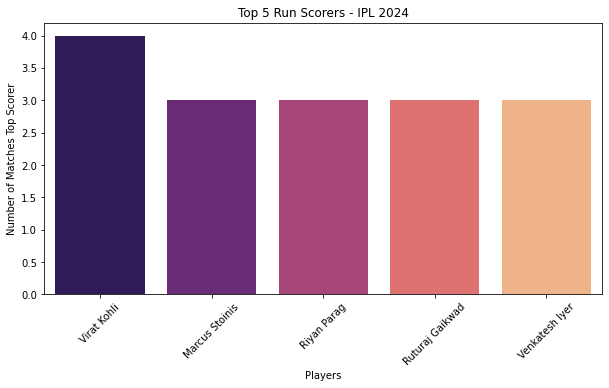

In [13]:
top_scorers = df.groupby("most_runs")["most_runs"].count().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette="magma")
plt.xlabel("Players")
plt.ylabel("Number of Matches Top Scorer")
plt.title("Top 5 Run Scorers - IPL 2024")
plt.xticks(rotation=45)
plt.show()


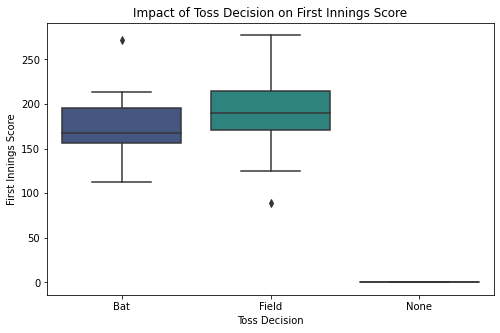

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["decision"], y=df["first_score"], palette="viridis")
plt.xlabel("Toss Decision")
plt.ylabel("First Innings Score")
plt.title("Impact of Toss Decision on First Innings Score")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
df_encoded = df.copy()
for col in ["team1", "team2", "toss_winner", "decision", "winner"]:
    df_encoded[col] = le.fit_transform(df[col])

# Prepare data
X = df_encoded[["team1", "team2", "toss_winner", "decision"]]  # Features
y = df_encoded["winner"]  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model accuracy
accuracy = model.score(X_test, y_test)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")


Prediction Accuracy: 26.67%


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [21]:
# Count number of matches won by each team
team_wins = df["winner"].value_counts().reset_index()
team_wins.columns = ["team", "wins"]

# Sort by wins
team_wins = team_wins.sort_values(by="wins", ascending=False)

# Display data
print(team_wins)


         team  wins
0     Kolkata    11
1   Rajasthan     9
2   Hyderabad     9
3     Chennai     7
4    Banglore     7
5     Lucknow     7
6       Delhi     7
7      Punjab     5
8     Gujarat     5
9      Mumbai     4
10  Abandoned     3


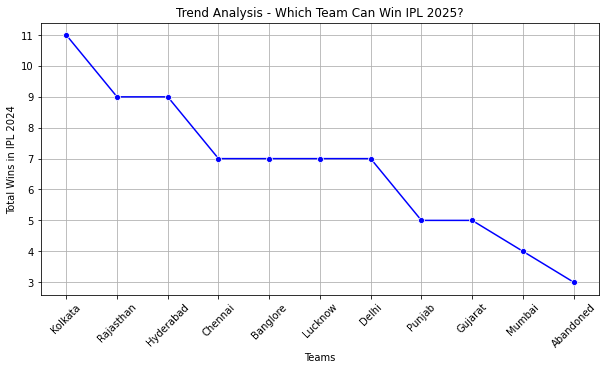

In [22]:
plt.figure(figsize=(10,5))

# Line plot
sns.lineplot(x=team_wins["team"], y=team_wins["wins"], marker="o", linestyle="-", color="b")

# Labels and title
plt.xlabel("Teams")
plt.ylabel("Total Wins in IPL 2024")
plt.title("Trend Analysis - Which Team Can Win IPL 2025?")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


In [23]:
import pandas as pd

# Load the raw dataset
raw_file_path = "Downloads/ipl2024_raw.csv"
df = pd.read_csv(raw_file_path)

# Display first few rows
print("Raw Data Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Fill missing numerical values with 0 (for scores and wickets)
df["first_score"].fillna(0, inplace=True)
df["second_score"].fillna(0, inplace=True)
df["first_wkts"].fillna(10, inplace=True)  # Assume full 10 wickets lost if data is missing
df["second_wkts"].fillna(10, inplace=True)

# Fill missing categorical values with "Unknown"
df.fillna({"toss_winner": "Unknown", "winner": "Unknown", 
           "player_of_the_match": "Unknown", "most_runs": "Unknown", 
           "most_wkts": "Unknown"}, inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Save cleaned data
clean_file_path = "data/ipl2024_cleaned.csv"
df.to_csv(clean_file_path, index=False)

# Display summary after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

print(f"\n✅ Data Cleaning Complete! Cleaned file saved as {Downloads}")


Raw Data Preview:
   id           date      team1      team2 toss_winner decision  first_score  \
0   1  March 22,2024   Banglore    Chennai    Banglore      Bat          173   
1   2  March 23,2024      Delhi     Punjab      Punjab    Field          174   
2   3  March 23,2024    Kolkata  Hyderabad   Hyderabad    Field          208   
3   4  March 24,2024  Rajasthan    Lucknow   Rajasthan      Bat          193   
4   5  March 24,2024    Gujarat     Mumbai      Mumbai    Field          168   

   first_wkts  second_score  second_wkts     winner player_of_the_match  \
0           6           176            4    Chennai   Mustafizur Rahman   
1           9           177            6     Punjab          Sam Curran   
2           7           204            7    Kolkata       Andre Russell   
3           4           173            6  Rajasthan        Sanju Samson   
4           6           162            9    Gujarat       Sai Sudharsan   

       most_runs          most_wkts  
0     Anuj R

OSError: Cannot save file into a non-existent directory: 'data'